# MOVIE INDUSTRY ANALYSIS FOR MICROSOFT

## INTRODUCTION
Microsoft sees all the big companies creating original video content and they want to get in on the fun. 
They have decided to create a new movie studio, but they don’t know anything about creating movies. 
You are charged with exploring what types of films are currently doing the best at the box office.
You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

![Clapperboard in production](images/avel-chuklanov-Hn3S90f6aak-unsplash-edited.jpg)

<span>Photo by <a href="https://unsplash.com/@chuklanov?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Avel Chuklanov</a> on <a href="https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a></span>




## OVERVIEW
For this project, we will use exploratory data analysis to generate insights for a business stakeholder.

## OBJECTIVES
In this Assignment, we will undertake the following:
* Clean our datasets and convert them to desired formats for our analysis.
* Lean a little on feature engineering, to create new columns from our datasets, for better insights.
* Join several datasets to form new datasets for more analysis.
* Explore our datasets to find patterns and useful information.
* Translate the findings and patterns on graphs to enable easy and fast visual understanding of our findings.
* Translate our findings into easily understandable insights by the stakeholders, and also provide our recommendations.



## DATA UNDERSTANDING
Data for this analysis will be pulled from three files, obtained from different sources:

Because we had to clean several datasets, the process would have cluttered this working notebook,
and so, we have moved the cleaning of our four datasets to a separate notebook `(python_eda.ipynb)` located in the same folder as this working notebook,
where we cleaned the data and saved the cleaned data in new files in the data folder `data/` that we'll use in this notebook.

So any cleaning done in this notebook will only be those that needed to be done in the moment.

All the files are also in the CSV format, with the first row representing the column names for each dataset.

### The Numbers dataset
`cleaned_movie_budgets.csv` which was originally obtained from [The Numbers](https://www.the-numbers.com/movie/budgets/all), a site that collects data on movies.

**Contents** : Contains the budget for movie, together with the domestic and worldwide gross
* `release_date(datetime64)`: the movie's release date
* `movie(object)`: the name of the movie
* `production_budget(int64)` : the amount of money used for budgeting the movie
* `domestic_gross(int64)` : the amount of revenue generated by movie in the origin country
* `worldwide_gross(int64)` : total ammount generated by the movie worldwide
* `approx_profit(int64)` : the difference between the worldwide gross and production budget
* `approx_profit_perc(float64)` : approximate profit, as a percentage of the production budget
* `year_of_release(int64)` : year the movie was release, as an integer
* `month_of_release(int64)` : the month the movie was released as an integer


### IMBD datasets
The remaining two datasets were originally obtained from [IMDB](https://www.imdb.com/interfaces/), a site that collects data on movies.

**1. `cleaned_title_basics.csv`**

**Contents** : contains the following information about title:
* `tconst(string)` : alphanumeric unique identifier for the title
* `primary_title(string)` : the more popular title / the title used by the filmmakers on promotional materials at the point of release
* `start_year(integer)` : the year the first revenue was recorded
* `runtime_minutes ` : the time it takes to play the whole movie in minutes
* `genres` : the classification of the movie

**2. `cleaned_title_ratings.csv`**

**Contents** :
* `tconst(object)` : a unique identifier of the movie
* `averagerating(float64)` : the average ratings for the movie
* `numvotes(int64 )` : the number of votes casted towards the ratings


## BUSINESS UNDERSTANDING
Our analysis will be exploring the data mentioned above, in order to help our stake holders get and idea of the movies that are currently doing extremely well in the industry.

It will also help the business get an idea of what it will take to be a part of the movie industry.
some of the questions  our analysis will trry to answer inclede:
* what are the most profitable movies?
* What are the most profitable genre?
* What is the average cot of producing these movies?

In answering these questions, we'll be able to give the business an idea of what the industry is like.

## Loading the datasets

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# we'll use the library pandasql to run SQL-style queries on our dataframes
from pandasql import sqldf 

%matplotlib inline

It's helpful to write a lambda function that will make it quicker and easier to write our queries.  Normally, we would have to pass in the global variables every time we use an object.  In order to avoid doing this every time, we'll write a lambda to do this for us:

In [3]:
# lambda function to take care of our sqdl global variables
pysqldf = lambda q: sqldf(q, globals())

In [4]:
# load out datasets
title_basics = pd.read_csv('./data/cleaned_title_basics.csv')
title_ratings = pd.read_csv('./data/cleaned_title_ratings.csv')
movie_budgets = pd.read_csv('./data/cleaned_movie_budgets.csv')

### Joining Tables `title_basics` and `movie_budgets`

We will now join the tables title basics and movie budgets using pandasql.

In [5]:
title_basics.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,one day before the rainy season,2019,114.0,"Biography,Drama"
2,tt0069049,the other side of the wind,2018,122.0,Drama
3,tt0100275,the wandering soap opera,2017,80.0,"Comedy,Drama,Fantasy"
4,tt0111414,a thin life,2018,75.0,Comedy


In [6]:
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,approx_profit,approx_profit_perc,year_of_release,month_of_release
0,2009-12-18,avatar,425000000,760507625,2776345279,2351345279,553.26,2009,12
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,635063875,154.67,2011,5
2,2019-06-07,dark phoenix,350000000,42762350,149762350,-200237650,-57.21,2019,6
3,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,1072413963,324.38,2015,5
4,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747,999721747,315.37,2017,12


In [7]:
q = """
SELECT *
FROM title_basics
JOIN movie_budgets
    ON title_basics.primary_title = movie_budgets.movie
WHERE year_of_release >= 2010
"""

title_basics_with_movie_budgets = pysqldf(q)

In [8]:
title_basics_with_movie_budgets.head()

,tconst,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,approx_profit,approx_profit_perc,year_of_release,month_of_release
0,tt1298650,pirates of the caribbean: on stranger tides,2011,136.0,"Action,Adventure,Fantasy",2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,635063875,154.67,2011,5
1,tt6565702,dark phoenix,2019,113.0,"Action,Adventure,Sci-Fi",2019-06-07,dark phoenix,350000000,42762350,149762350,-200237650,-57.21,2019,6
2,tt2395427,avengers: age of ultron,2015,141.0,"Action,Adventure,Sci-Fi",2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,1072413963,324.38,2015,5
3,tt4154756,avengers: infinity war,2018,149.0,"Action,Adventure,Sci-Fi",2018-04-27,avengers: infinity war,300000000,678815482,2048134200,1748134200,582.71,2018,4
4,tt0974015,justice league,2017,120.0,"Action,Adventure,Fantasy",2017-11-17,justice league,300000000,229024295,655945209,355945209,118.65,2017,11


Check to see if there were any duplicates as a result of our join, and figure out how to work with them.

In [9]:
title_basics_with_movie_budgets.duplicated(subset='movie', keep='first').value_counts()

False    1544
True      492
dtype: int64

Before handling the duplicated items, we realise another anomaly with out dataset, in that the `title basics` and `movie budgets` had start_year and release_date assigned to them, as a result our new join has two year references, reffering to when the movie came out, however, they don't match.

In [10]:
q = """
SELECT *
FROM title_basics_with_movie_budgets
WHERE start_year != year_of_release
"""
results = pysqldf(q)
results.head()

,tconst,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,approx_profit,approx_profit_perc,year_of_release,month_of_release
0,tt2363363,robin hood,2013,92.0,"Action,Drama",2010-05-14,robin hood,210000000,105487148,322459006,112459006,53.55,2010,5
1,tt4532826,robin hood,2018,116.0,"Action,Adventure,Thriller",2010-05-14,robin hood,210000000,105487148,322459006,112459006,53.55,2010,5
2,tt8558276,robin hood,2017,60.0,"Action,Adventure,History",2010-05-14,robin hood,210000000,105487148,322459006,112459006,53.55,2010,5
3,tt1926979,alice in wonderland,2011,48.0,Documentary,2010-03-05,alice in wonderland,200000000,334191110,1025491110,825491110,412.75,2010,3
4,tt7496196,hugo,2017,80.0,Documentary,2011-11-23,hugo,180000000,73864507,180047784,47784,0.03,2011,11


Upon digging into the problem further, and researching more about the issue. We realise that in cases were the year difference is less that 3 years, the dataset `movie_budgets` has a more accurate record in terms of the year the movie came out. And in cases were the difference is greater than 3 years, there is a high likelihood that the datasets are reffering to different movies with the same name, or different sequels of the same movie, and so, before dropping the duplicates, we'll drop any rows were the year difference between `movie budgets` and `title_basics` is greater than 3 years, and we'll keep the `movie_budget` year and drop that  of `title_basics`.

In [11]:

# drop rows were difference between start_year and year_of_release is greater that 3
title_basics_with_movie_budgets.drop(title_basics_with_movie_budgets[
    ((title_basics_with_movie_budgets['start_year'] - title_basics_with_movie_budgets['year_of_release']) > 3) |
     ((title_basics_with_movie_budgets['start_year'] - title_basics_with_movie_budgets['year_of_release']) < -3)
].index, inplace = True)

In [12]:
# drop the duplicates
title_basics_with_movie_budgets.drop_duplicates(subset='movie', inplace=True)

In [13]:
title_basics_with_movie_budgets.head()

,tconst,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,approx_profit,approx_profit_perc,year_of_release,month_of_release
0,tt1298650,pirates of the caribbean: on stranger tides,2011,136.0,"Action,Adventure,Fantasy",2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,635063875,154.67,2011,5
1,tt6565702,dark phoenix,2019,113.0,"Action,Adventure,Sci-Fi",2019-06-07,dark phoenix,350000000,42762350,149762350,-200237650,-57.21,2019,6
2,tt2395427,avengers: age of ultron,2015,141.0,"Action,Adventure,Sci-Fi",2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,1072413963,324.38,2015,5
3,tt4154756,avengers: infinity war,2018,149.0,"Action,Adventure,Sci-Fi",2018-04-27,avengers: infinity war,300000000,678815482,2048134200,1748134200,582.71,2018,4
4,tt0974015,justice league,2017,120.0,"Action,Adventure,Fantasy",2017-11-17,justice league,300000000,229024295,655945209,355945209,118.65,2017,11


we will then drop a couple of columns, 
* `primary_title` - we have `movie`, with the same information
* `start_year` - we have `release_date` that is more accurate

In [14]:
# drop the columns stated above
title_basics_with_movie_budgets.drop('primary_title', axis=1, inplace=True)
title_basics_with_movie_budgets.drop('start_year', axis=1, inplace=True)

In [15]:
title_basics_with_movie_budgets.head()

,tconst,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,approx_profit,approx_profit_perc,year_of_release,month_of_release
0,tt1298650,136.0,"Action,Adventure,Fantasy",2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,635063875,154.67,2011,5
1,tt6565702,113.0,"Action,Adventure,Sci-Fi",2019-06-07,dark phoenix,350000000,42762350,149762350,-200237650,-57.21,2019,6
2,tt2395427,141.0,"Action,Adventure,Sci-Fi",2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,1072413963,324.38,2015,5
3,tt4154756,149.0,"Action,Adventure,Sci-Fi",2018-04-27,avengers: infinity war,300000000,678815482,2048134200,1748134200,582.71,2018,4
4,tt0974015,120.0,"Action,Adventure,Fantasy",2017-11-17,justice league,300000000,229024295,655945209,355945209,118.65,2017,11


### joining table `title_ratings` to the new dataset

The last table we need to join is the `title_ratings` that contains the movie ratings, and number of counts per movie.

In [16]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [17]:
q = """
SELECT *
FROM title_basics_with_movie_budgets
JOIN title_ratings
    USING(tconst)
"""

title_budget_ratings = pysqldf(q)

In [18]:
title_budget_ratings.head()

,tconst,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,approx_profit,approx_profit_perc,year_of_release,month_of_release,averagerating,numvotes
0,tt1298650,136.0,"Action,Adventure,Fantasy",2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,635063875,154.67,2011,5,6.6,447624
1,tt6565702,113.0,"Action,Adventure,Sci-Fi",2019-06-07,dark phoenix,350000000,42762350,149762350,-200237650,-57.21,2019,6,6.0,24451
2,tt2395427,141.0,"Action,Adventure,Sci-Fi",2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,1072413963,324.38,2015,5,7.3,665594
3,tt4154756,149.0,"Action,Adventure,Sci-Fi",2018-04-27,avengers: infinity war,300000000,678815482,2048134200,1748134200,582.71,2018,4,8.5,670926
4,tt0974015,120.0,"Action,Adventure,Fantasy",2017-11-17,justice league,300000000,229024295,655945209,355945209,118.65,2017,11,6.5,329135


describe our dataset, to have an overview of what it now contains

In [19]:
title_budget_ratings.describe()

,runtime_minutes,production_budget,domestic_gross,worldwide_gross,approx_profit,approx_profit_perc,year_of_release,month_of_release,averagerating,numvotes
count,1524.000000,1.524000e+03,1.524000e+03,1.524000e+03,1.524000e+03,1524.000000,1524.000000,1524.000000,1524.000000,1.524000e+03
mean,107.921916,4.475576e+07,5.672481e+07,1.415345e+08,9.677875e+07,295.235459,2013.860892,6.701444,6.400328,1.173329e+05
std,17.343914,5.570775e+07,8.388135e+07,2.311988e+08,1.907049e+08,1222.467238,2.588741,3.402826,0.958725,1.629154e+05
min,41.000000,9.000000e+03,1.242000e+03,1.242000e+03,-2.002376e+08,-99.990000,2010.000000,1.000000,1.600000,1.000000e+01
25%,95.000000,8.900000e+06,5.032213e+06,1.128719e+07,-2.044772e+05,-8.747500,2012.000000,4.000000,5.800000,1.842675e+04
50%,106.000000,2.410000e+07,2.853540e+07,5.359967e+07,2.544801e+07,123.640000,2014.000000,7.000000,6.500000,6.120800e+04
75%,118.000000,5.500000e+07,6.775653e+07,1.590509e+08,1.037555e+08,311.635000,2016.000000,10.000000,7.100000,1.440070e+05
max,180.000000,4.106000e+08,7.000596e+08,2.048134e+09,1.748134e+09,41556.470000,2019.000000,12.000000,8.800000,1.841066e+06


## Explorations

### World Wide Movie Gross

Because we are going to focus on the worldwide_gross column as our primary indicater of revenue, lets explore the dataset a little

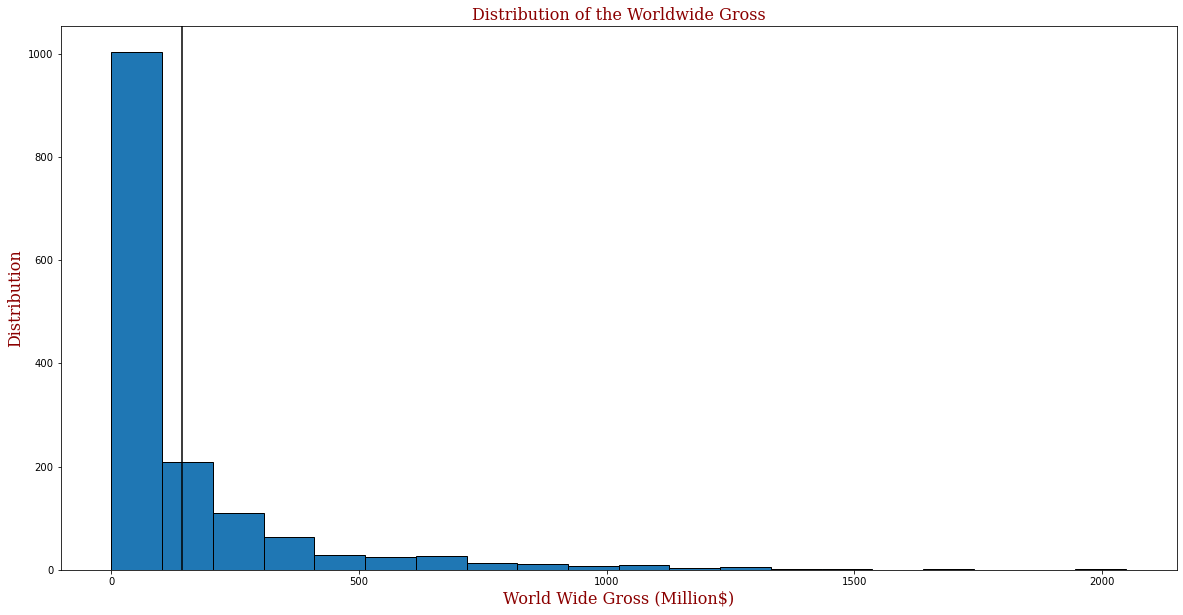

In [20]:
# plot a histogram  of the wolrdwide gross
figure, ax = plt.subplots(figsize=(20,10))

# font to control the labels stylings
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# multiply our value by a million to make reding easier
x = title_budget_ratings['worldwide_gross']/1000000

# plot our histogram and set bins to 20 for better x-axis distributions and visual
ax.hist(x, edgecolor='black', bins=20)

# screate a vertical line of the datasets mean, to see where our mean lie in the dataset
ax.axvline(x.mean(), color='black')

# label our graph
ax.set_title("Distribution of the Worldwide Gross", fontdict=font)
ax.set_xlabel('World Wide Gross (Million$)', fontdict=font)
ax.set_ylabel('Distribution', fontdict=font);

From the graph, we can see that most of our data is leaning towards the left, that is, most of the data points are on the left side of the mean.

Because our data is highly skewed, using the mean as our measure of central tendency might not work, the mode which is most insensitive in cases like these might also not work because our data is in the mllions, and so barely repeats as exact data points.

And so we'll settle on median as our measure of central tendency.

In [21]:
# find the median
title_budget_ratings['worldwide_gross'].median()

53599673.5

### Deeper Look Into Table Relations

In this section, we'll mainly focus on the relationship between worldwide gross and the rest of the variable in the table.

In [22]:
# calculate the correlation 
title_budget_ratings.corr(method='pearson')

,runtime_minutes,production_budget,domestic_gross,worldwide_gross,approx_profit,approx_profit_perc,year_of_release,month_of_release,averagerating,numvotes
runtime_minutes,1.000000,0.356061,0.293071,0.307752,0.269088,-0.059009,0.081959,0.136257,0.375468,0.425767
production_budget,0.356061,1.000000,0.709777,0.783717,0.658015,-0.051951,0.055670,0.012277,0.157849,0.534039
domestic_gross,0.293071,0.709777,1.000000,0.944214,0.937371,0.097141,0.084721,0.017997,0.265327,0.642095
worldwide_gross,0.307752,0.783717,0.944214,1.000000,0.983402,0.081591,0.091952,0.024032,0.252824,0.631449
approx_profit,0.269088,0.658015,0.937371,0.983402,1.000000,0.114091,0.095215,0.025548,0.260398,0.609529
approx_profit_perc,-0.059009,-0.051951,0.097141,0.081591,0.114091,1.000000,0.033193,-0.006335,-0.016353,0.064852
year_of_release,0.081959,0.055670,0.084721,0.091952,0.095215,0.033193,1.000000,-0.071577,0.030337,-0.119761
month_of_release,0.136257,0.012277,0.017997,0.024032,0.025548,-0.006335,-0.071577,1.000000,0.155607,0.087190
averagerating,0.375468,0.157849,0.265327,0.252824,0.260398,-0.016353,0.030337,0.155607,1.000000,0.469378
numvotes,0.425767,0.534039,0.642095,0.631449,0.609529,0.064852,-0.119761,0.087190,0.469378,1.000000


Because our stakeholders greatest interest is in the movies with the highest worldwide gross(revenue), we'll focus on the item with the highest correlation to the worldwide_gross.

In this case, we see that the highest correlations to worldwide_gross are:
* `approx_profit` - 0.98
* `domestic_gross` - 0.94
* `production_budget` - 0.78
* `numcounts` - 0.64

we'll ignore the first two because they are calculated using worldwide_gross, and consider the last two, especially the production budget.

Let's get a better view of this relationship using plots

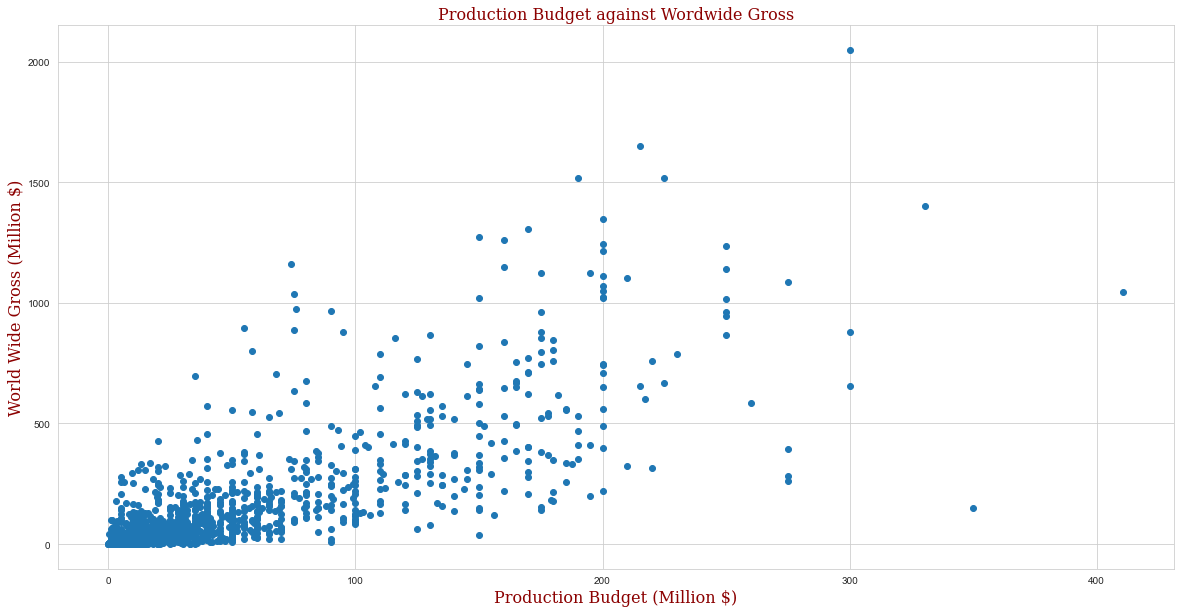

In [23]:
# Plotting scatter plots
# set seaborn gridstyle
sns.set_style('whitegrid')

# font for label styling
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# declare figure and axes
fig, ax = plt.subplots(figsize=(20,10))

# get data and divide by 1Million for better scaling and visualization
x = title_budget_ratings['production_budget']/1000000
y = title_budget_ratings['worldwide_gross']/1000000

# plot our scatter plots
ax.scatter(x, y)

# set our labels
ax.set_title("Production Budget against Wordwide Gross", fontdict=font)
ax.set_xlabel("Production Budget (Million $)", fontdict=font)
ax.set_ylabel("World Wide Gross (Million $)", fontdict=font);

From our plot, we can see that our revenue increases as our budget increases, upto a certain point

Lets also dig a little deeper into the production column.

In [24]:
title_budget_ratings['production_budget'].describe()

count    1.524000e+03
mean     4.475576e+07
std      5.570775e+07
min      9.000000e+03
25%      8.900000e+06
50%      2.410000e+07
75%      5.500000e+07
max      4.106000e+08
Name: production_budget, dtype: float64

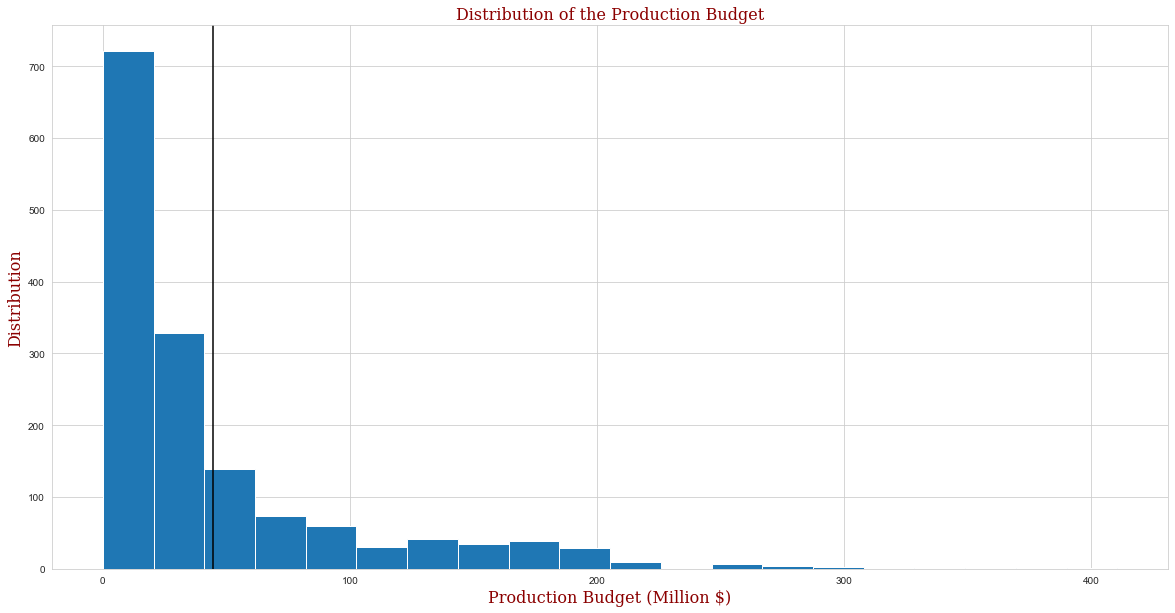

In [25]:
# plot the production budget data
figure, ax = plt.subplots(figsize=(20,10))

# font for labels styling
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# get our data and divide by 1million for better scalling and visualisation
x = title_budget_ratings['production_budget']/1000000

# plot our histogram
ax.hist(x, bins=20)

# plot mean vericaly to see were it lies.
ax.axvline(x.mean(), color='black')
 
# set labels
ax.set_title('Distribution of the Production Budget', fontdict=font)
ax.set_xlabel('Production Budget (Million $)', fontdict=font)
ax.set_ylabel('Distribution', fontdict=font);


This dataset also have a very skewed data, and this definetely has an effect on the mean as a measure of central tendency,lets consider mode and median

In [26]:
title_budget_ratings['production_budget'].mean()

44755764.20603675

In [27]:
title_budget_ratings['production_budget'].mode()

0    20000000
dtype: int64

In [28]:
title_budget_ratings['production_budget'].median()

24100000.0

### Finding the highest grossing Movies

Let's now look at our movie revenues, 
* What are the top ten most grossing movies?
* Since returns are usually measured interms of the amoount invested, lets also look at the most profitable movies.

In [29]:
# Sort the data using the worldwide_gross column to find the top ten most grossing movies.
top_ten_most_grossing = title_budget_ratings.sort_values(by='worldwide_gross', ascending=False)[:10]
top_ten_most_grossing

,tconst,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,approx_profit,approx_profit_perc,year_of_release,month_of_release,averagerating,numvotes
3,tt4154756,149.0,"Action,Adventure,Sci-Fi",2018-04-27,avengers: infinity war,300000000,678815482,2048134200,1748134200,582.71,2018,4,8.5,670926
23,tt0369610,124.0,"Action,Adventure,Sci-Fi",2015-06-12,jurassic world,215000000,652270625,1648854864,1433854864,666.91,2015,6,7.0,539338
46,tt2820852,137.0,"Action,Crime,Thriller",2015-04-03,furious 7,190000000,353007020,1518722794,1328722794,699.33,2015,4,7.2,335074
18,tt0848228,143.0,"Action,Adventure,Sci-Fi",2012-05-04,the avengers,225000000,623279547,1517935897,1292935897,574.64,2012,5,8.1,1183655
2,tt2395427,141.0,"Action,Adventure,Sci-Fi",2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,1072413963,324.38,2015,5,7.3,665594
27,tt1825683,134.0,"Action,Adventure,Sci-Fi",2018-02-16,black panther,200000000,700059566,1348258224,1148258224,574.13,2018,2,7.3,516148
77,tt4881806,128.0,"Action,Adventure,Sci-Fi",2018-06-22,jurassic world: fallen kingdom,170000000,417719760,1305772799,1135772799,668.10,2018,6,6.2,219125
108,tt1323045,93.0,"Adventure,Drama,Sport",2013-11-22,frozen,150000000,400738009,1272469910,1122469910,748.31,2013,11,6.2,62311
95,tt2316801,112.0,"Drama,Fantasy,Romance",2017-03-17,beauty and the beast,160000000,504014165,1259199706,1099199706,687.00,2017,3,6.4,18100
28,tt3606756,118.0,"Action,Adventure,Animation",2018-06-15,incredibles 2,200000000,608581744,1242520711,1042520711,521.26,2018,6,7.7,203510


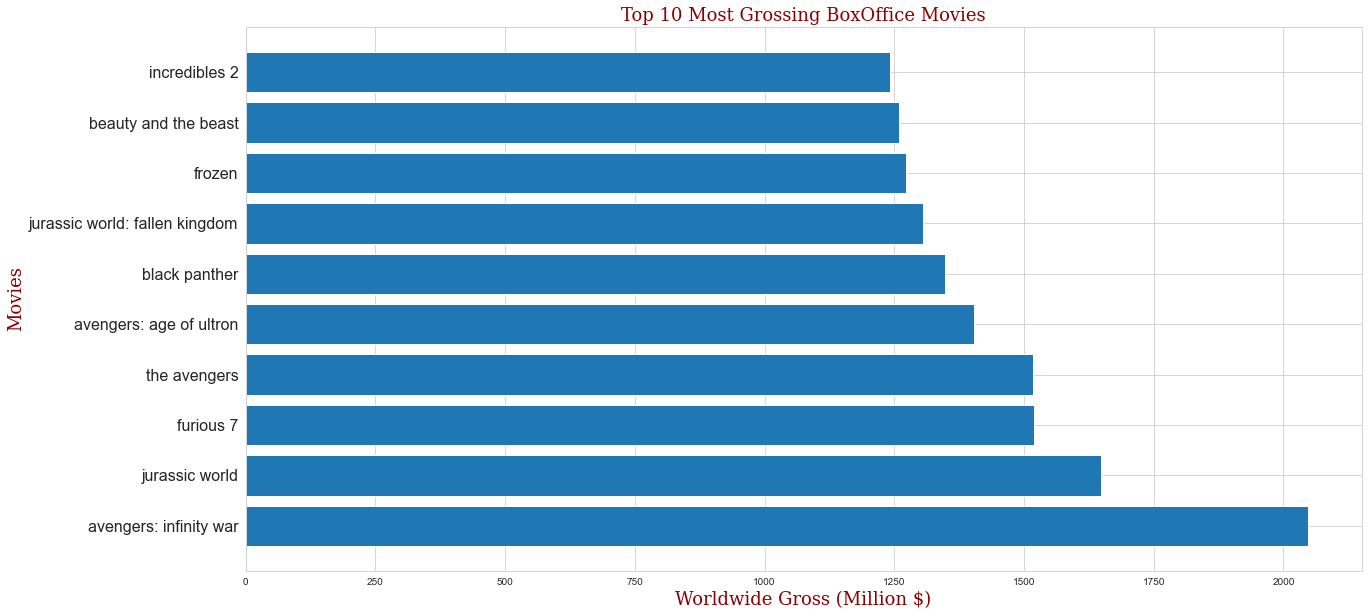

In [30]:
# plot the most grossing movies

fig, ax = plt.subplots(figsize=(20,10))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

# set a range to help with xticks ploting
ind = np.arange(10)

movie_names = top_ten_most_grossing['movie']
movie_revenue = top_ten_most_grossing['worldwide_gross']/1000000

ax.barh(movie_names, movie_revenue)

# set out title
ax.set_title("Top 10 Most Grossing BoxOffice Movies", fontdict=font)

# set our labels
ax.set_ylabel('Movies', fontdict=font)
ax.set_xlabel('Worldwide Gross (Million $)', fontdict=font);
ax.set_yticks(ind, minor=False)
ax.set_yticklabels(labels=movie_names, fontdict={'fontsize': 16, 'fontweight': 'normal' });

### Finding the most profitable movies

Because our stakeholder might be looking not just at the movie with the highest grossing ,but the movie with the highest profit margin,lets also explore these.

In [31]:
# get the most profitable movies
top_ten_most_profitable = title_budget_ratings.sort_values(by='approx_profit', ascending=False)[:10]
top_ten_most_profitable

,tconst,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,approx_profit,approx_profit_perc,year_of_release,month_of_release,averagerating,numvotes
3,tt4154756,149.0,"Action,Adventure,Sci-Fi",2018-04-27,avengers: infinity war,300000000,678815482,2048134200,1748134200,582.71,2018,4,8.5,670926
23,tt0369610,124.0,"Action,Adventure,Sci-Fi",2015-06-12,jurassic world,215000000,652270625,1648854864,1433854864,666.91,2015,6,7.0,539338
46,tt2820852,137.0,"Action,Crime,Thriller",2015-04-03,furious 7,190000000,353007020,1518722794,1328722794,699.33,2015,4,7.2,335074
18,tt0848228,143.0,"Action,Adventure,Sci-Fi",2012-05-04,the avengers,225000000,623279547,1517935897,1292935897,574.64,2012,5,8.1,1183655
27,tt1825683,134.0,"Action,Adventure,Sci-Fi",2018-02-16,black panther,200000000,700059566,1348258224,1148258224,574.13,2018,2,7.3,516148
77,tt4881806,128.0,"Action,Adventure,Sci-Fi",2018-06-22,jurassic world: fallen kingdom,170000000,417719760,1305772799,1135772799,668.10,2018,6,6.2,219125
108,tt1323045,93.0,"Adventure,Drama,Sport",2013-11-22,frozen,150000000,400738009,1272469910,1122469910,748.31,2013,11,6.2,62311
95,tt2316801,112.0,"Drama,Fantasy,Romance",2017-03-17,beauty and the beast,160000000,504014165,1259199706,1099199706,687.00,2017,3,6.4,18100
293,tt2293640,91.0,"Adventure,Animation,Comedy",2015-07-10,minions,74000000,336045770,1160336173,1086336173,1468.02,2015,7,6.4,193917
2,tt2395427,141.0,"Action,Adventure,Sci-Fi",2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,1072413963,324.38,2015,5,7.3,665594


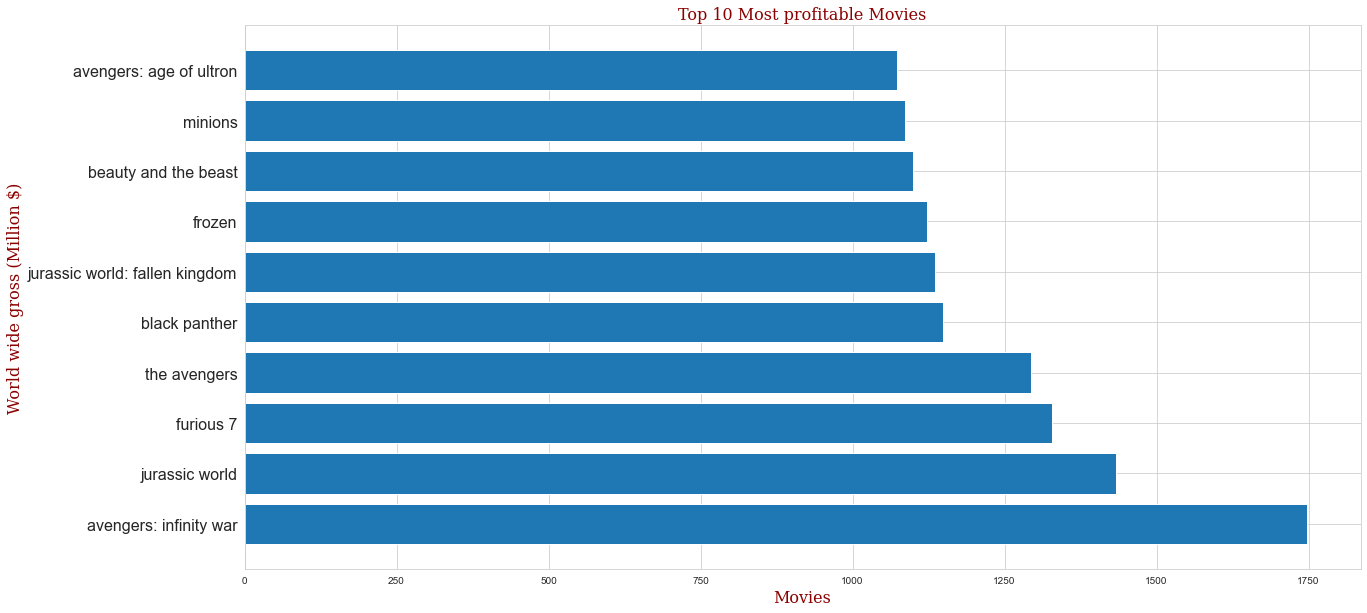

In [32]:
# plot most profitable movies
fig, ax = plt.subplots(figsize=(20,10))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

ind = np.arange(10)

movie_names = top_ten_most_profitable['movie']
movie_revenue = top_ten_most_profitable['approx_profit']/1000000

ax.barh(movie_names, movie_revenue)

# set out title
ax.set_title("Top 10 Most profitable Movies", fontdict=font)

ax.set_xlabel('Movies', fontdict=font)
ax.set_ylabel('World wide gross (Million $)', fontdict=font)
ax.set_yticks(ind, minor=False)
ax.set_yticklabels(labels=movie_names, fontdict={'fontsize': 16, 'fontweight': 'normal' });

### Checking for the Return on Investment(ROI)

Apart from just looking at the amount of profit generated by the movies, lets also look at the Return On Investment , particularly for our top 10 moct profitalble movie.

Looking at the ROI(retuen on investment) graphs/plots, enables us to get a clear visual glimpse of how well the movies performed.

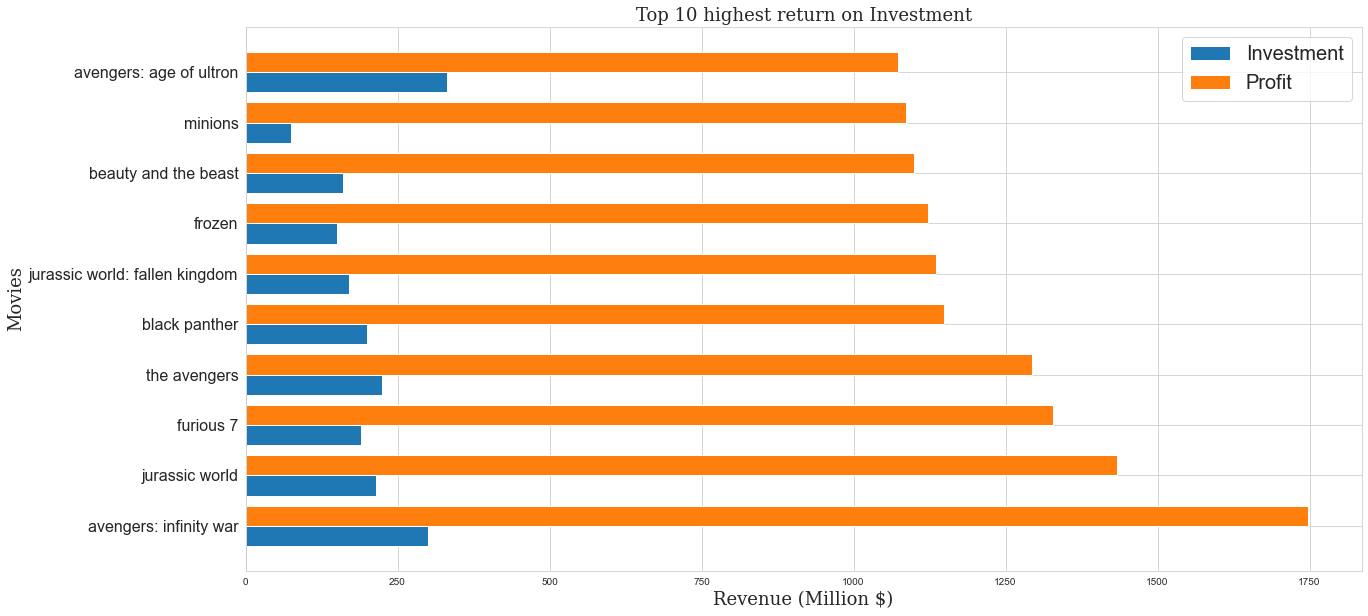

In [51]:
# plot our graphs

X = top_ten_most_profitable['movie']
production_budget = top_ten_most_profitable['production_budget']/1000000
approximate_profit = top_ten_most_profitable['approx_profit']/1000000
  
X_axis = np.arange(len(X))

font = {'family': 'serif',
        'weight': 'normal',
        'size': 18,
        }

fig, ax = plt.subplots(figsize=(20,10))

ax.barh(X_axis - 0.2, production_budget, 0.4, label = 'Investment')
ax.barh(X_axis + 0.2, approximate_profit, 0.4, label = 'Profit')
  
ax.set_yticks(X_axis)
ax.set_yticklabels
ax.set_ylabel("Movies", fontdict=font)
ax.set_xlabel("Revenue (Million $)", fontdict=font)
ax.set_title("Top 10 highest return on Investment", fontdict=font)

ax.set_yticklabels(labels=X, fontdict={'fontsize': 16, 'fontweight': 'normal' })
ax.legend(loc=1, prop={'size': 20});

# Views and Suggestions

Now that we have identified the most grossing, most profitable, and Highest return on investments, its time to answer the real Questions,

What will it take for the studio to get into the business of producing movies that do well in the box office?

With reference to the data from the most profitable movies, we'll answer the followith questions:

* How much budget should the studio expect to use?
* What movie Genres should the studio focus on?
* What is the best time to release our movies?

In answering the above questions, we'll use the dataset used to find the top most profitable movies<br>
In this case, we'll use the top 100 most profitable movies.

In [34]:
top_100_most_profitable = title_budget_ratings.sort_values(by='approx_profit', ascending=False)[:100]
top_100_most_profitable.reset_index(drop=True, inplace=True)
top_100_most_profitable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tconst              100 non-null    object 
 1   runtime_minutes     100 non-null    float64
 2   genres              100 non-null    object 
 3   release_date        100 non-null    object 
 4   movie               100 non-null    object 
 5   production_budget   100 non-null    int64  
 6   domestic_gross      100 non-null    int64  
 7   worldwide_gross     100 non-null    int64  
 8   approx_profit       100 non-null    int64  
 9   approx_profit_perc  100 non-null    float64
 10  year_of_release     100 non-null    int64  
 11  month_of_release    100 non-null    int64  
 12  averagerating       100 non-null    float64
 13  numvotes            100 non-null    int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 11.1+ KB


In [35]:
top_100_most_profitable.describe()

,runtime_minutes,production_budget,domestic_gross,worldwide_gross,approx_profit,approx_profit_perc,year_of_release,month_of_release,averagerating,numvotes
count,100.00000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,122.56000,1.587720e+08,2.994200e+08,8.535590e+08,6.947870e+08,542.164100,2014.450000,7.170000,7.202000,4.299934e+05
std,21.87583,6.880083e+07,1.222630e+08,2.855502e+08,2.558846e+08,355.508526,2.512092,3.120655,0.774985,2.876124e+05
min,64.00000,2.000000e+07,1.249870e+08,4.263512e+08,3.977294e+08,154.670000,2010.000000,2.000000,4.100000,5.900000e+01
25%,103.75000,1.145000e+08,2.156054e+08,6.478907e+08,5.012625e+08,321.117500,2012.000000,5.000000,6.600000,2.437018e+05
50%,126.00000,1.650000e+08,2.665563e+08,7.787740e+08,6.199516e+08,413.935000,2014.000000,6.000000,7.300000,3.812480e+05
75%,137.00000,2.000000e+08,3.538707e+08,1.022284e+09,8.422647e+08,642.637500,2016.250000,11.000000,7.800000,5.458145e+05
max,169.00000,4.106000e+08,7.000596e+08,2.048134e+09,1.748134e+09,2031.760000,2019.000000,12.000000,8.800000,1.841066e+06


### Q1. How much budget should the studio expect to use?

To answer this, we'll fing the average production_budget for the top 100 movies

In [36]:
top_100_mean_budget = top_100_most_profitable['production_budget'].mean()
top_100_mean_budget

158772000.0

From the above, the studio will need an average of `$158,772,000` per movie as a production budget, to produce movies

### Q2. What movie Genres should the studio focus on?

To answer this question, we'll have to find the most dominant movie ganre in the top 100 movies.

there are cases were one movie belongs to different genres, that is "action, adventure, crime",<br
in such cases, we'll consider these as three separate genres.

we'll loop through the genre column and create a dictionary that counts any and all instances of each genre,<br>
and come up with a dictionary that looks like so, 
```

{'action':1, 'adventure':5, 'crime':4}
```


In [ ]:
genres_in_top_100 = top_100_most_profitable['genres'].tolist()

In [38]:
top_100_genre_count = {}

for item in genres_in_top_100:
    split_genres = item.split(',')
    # print(split_genres)
    if len(split_genres) > 1:
        for genre in split_genres:
            if genre in top_100_genre_count.keys():
                top_100_genre_count[genre] += 1
            else:
                top_100_genre_count[genre] = 1
            # print(genre)


top_100_genre_count

{'Action': 61,
 'Adventure': 81,
 'Sci-Fi': 31,
 'Crime': 4,
 'Thriller': 11,
 'Drama': 13,
 'Sport': 1,
 'Fantasy': 18,
 'Romance': 2,
 'Animation': 25,
 'Comedy': 29,
 'Biography': 3,
 'Music': 2,
 'Family': 8,
 'Horror': 1,
 'Mystery': 1}

In [ ]:
top_100_genre_count = sorted(top_100_genre_count.items(), key=lambda x: x[1], reverse=True)

<ipython-input-40-ac8732302d59>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=movie_genre, rotation=45, fontdict={'family': 'serif', 'weight': 'normal','size': 16,});


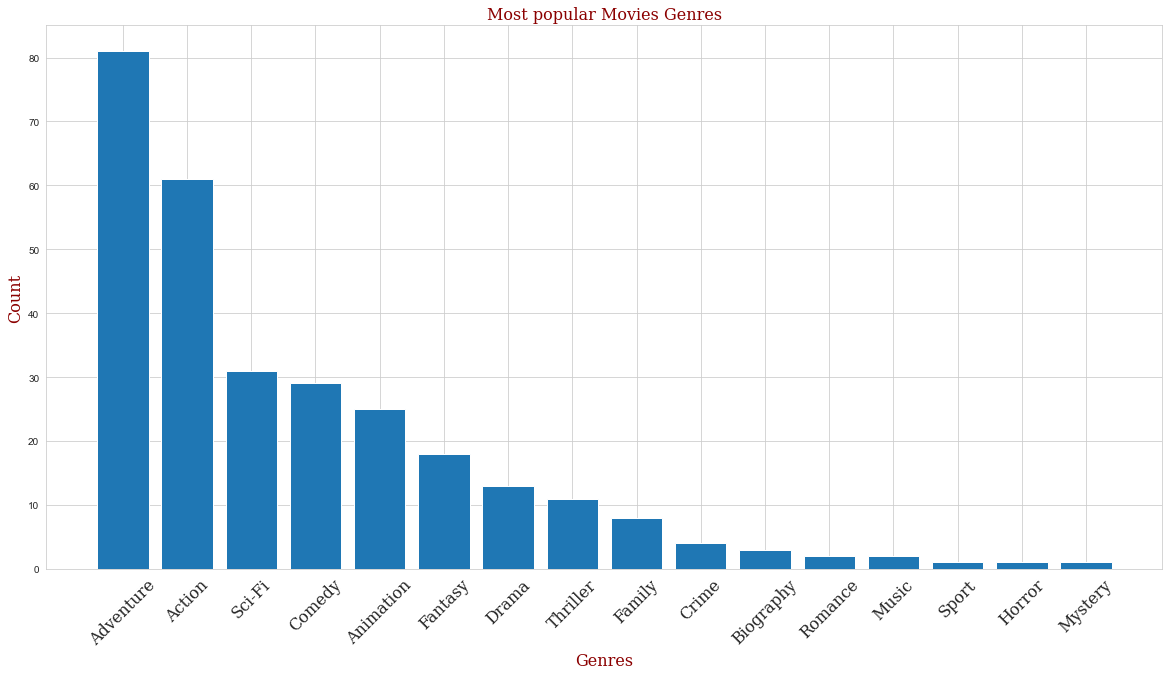

In [40]:
fig, ax = plt.subplots(figsize=(20,10))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

movie_genre = [x[0] for x in top_100_genre_count]
genre_count = [x[1] for x in top_100_genre_count]

ax.bar(movie_genre, genre_count)

# set out title
ax.set_title("Most popular Movies Genres", fontdict=font)

ax.set_xlabel('Genres', fontdict=font)
ax.set_ylabel('Count', fontdict=font)
ax.set_xticklabels(labels=movie_genre, rotation=45, fontdict={'family': 'serif', 'weight': 'normal','size': 16,});

In [ ]:
# as a combination the genres are ranked as follows
top_10_genre_combo = {}

for genre in genres_in_top_100:
    # genre = item.split(',')
    # print(split_genres)
    # if len(split_genres) > 1:
    #     for genre in split_genres:
    if genre in top_10_genre_combo.keys():
        top_10_genre_combo[genre] += 1
    else:
        top_10_genre_combo[genre] = 1
    # print(genre)


top_10_genre_combo

In [42]:
top_10_genre_combo = sorted(top_10_genre_combo.items(), key=lambda x: x[1], reverse=True)
top_10_genre_combo[:10]

[('Action,Adventure,Sci-Fi', 25),
 ('Adventure,Animation,Comedy', 16),
 ('Action,Adventure,Fantasy', 8),
 ('Action,Adventure,Animation', 7),
 ('Action,Adventure,Comedy', 7),
 ('Adventure,Family,Fantasy', 4),
 ('Action,Crime,Thriller', 3),
 ('Action,Adventure,Thriller', 2),
 ('Action,Sci-Fi,Thriller', 2),
 ('Adventure,Fantasy', 2)]

<ipython-input-52-9d07e01bbf12>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=movie_genre, fontdict={'family': 'serif', 'weight': 'normal','size': 16,});


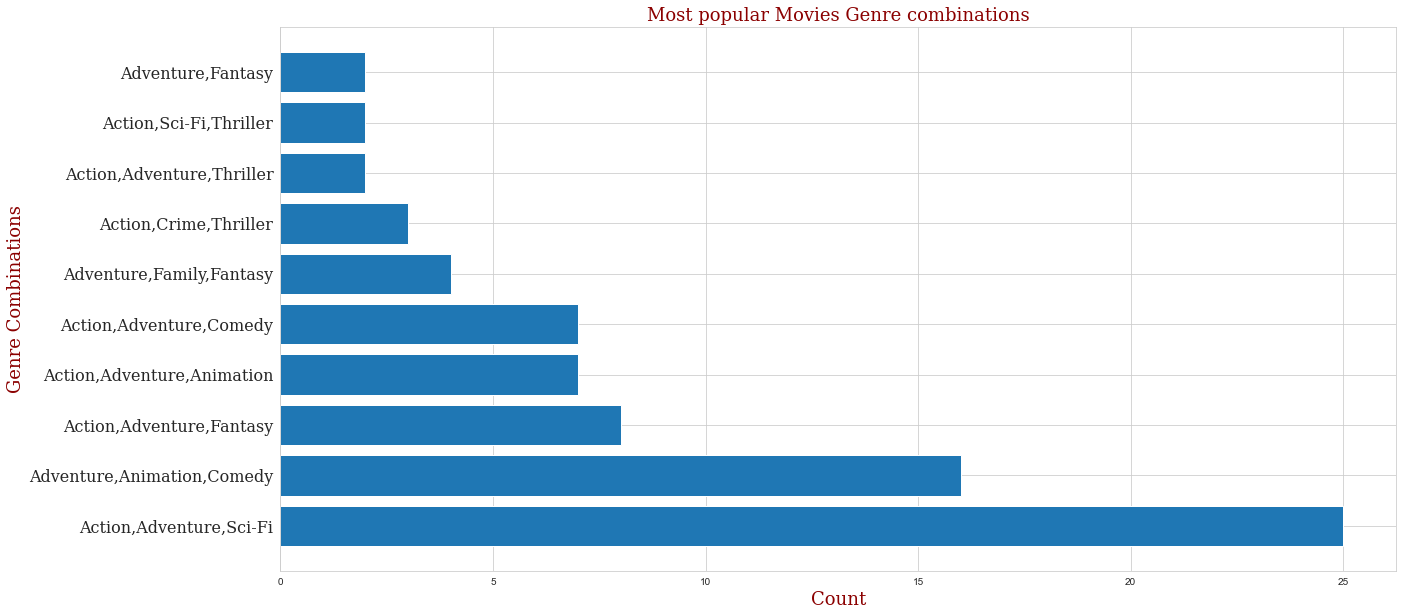

In [52]:
fig, ax = plt.subplots(figsize=(20,10))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

movie_genre = [x[0] for x in top_10_genre_combo[:10]]
genre_count = [x[1] for x in top_10_genre_combo[:10]]

ax.barh(movie_genre, genre_count)

# set out title
ax.set_title("Most popular Movies Genre combinations", fontdict=font)

ax.set_ylabel('Genre Combinations', fontdict=font)
ax.set_xlabel('Count', fontdict=font)

ax.set_yticklabels(labels=movie_genre, fontdict={'family': 'serif', 'weight': 'normal','size': 16,});

In terms of the genres, the top 5 genres are:
* `'Adventure', 81`
* `'Action', 61`
* `'Sci-Fi', 31`
* `'Comedy', 29`
* `'Animation', 25`

and as a combination of genres, the top 5 include:
* `('Action,Adventure,Sci-Fi', 25),`
* `('Adventure,Animation,Comedy', 16),`
* `('Action,Adventure,Fantasy', 8),`
* `('Action,Adventure,Animation', 7),`
* `('Action,Adventure,Comedy', 7),`

The studio should therefore focus on the above genres as from our data, they are the most grossing genres.

### Q3. What is the best time to release our movies?

To answer this question, we'll look at the most prevelant quater of the year when most of the movies were release.

In [44]:
# get the month column for the top 100 most profitable
release_month_top_100 = top_100_most_profitable['month_of_release']
release_month_top_100

0      4
1      6
2      4
3      5
4      2
      ..
95     7
96    12
97    12
98    12
99     2
Name: month_of_release, Length: 100, dtype: int64

In [53]:
quater_counter = {
    'Quater-1-Jan-March':0,
    'Quater-2-April-June':0,
    'Quater-3-July-September':0,
    'Quater-4-October-December':0
}

for month in release_month_top_100:
    if month >= 1 and month <= 3:
        quater_counter['Quater-1-Jan-March'] += 1
    elif month >= 4 and month <= 6:
        quater_counter['Quater-2-April-June'] += 1
    elif month >= 7 and month <= 9:
        quater_counter['Quater-3-July-September'] += 1
    else:
        quater_counter['Quater-4-October-December'] += 1

quater_counter

{'Quater-1-Jan-March': 13,
 'Quater-2-April-June': 38,
 'Quater-3-July-September': 17,
 'Quater-4-October-December': 32}

<ipython-input-54-90d55ab09fd9>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=month_of_release, fontdict={'family': 'serif', 'weight': 'normal','size': 16,});


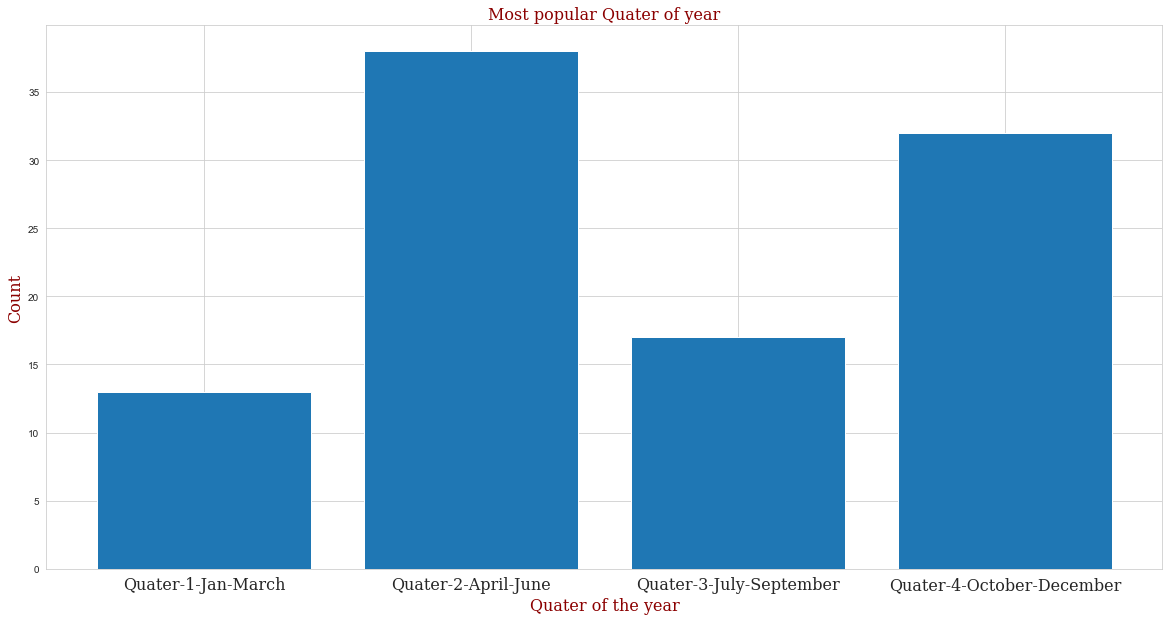

In [54]:
fig, ax = plt.subplots(figsize=(20,10))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

month_of_release = quater_counter.keys()
number_of_movies = quater_counter.values()

ax.bar(month_of_release, number_of_movies)

# set out title
ax.set_title("Most popular Quater of year", fontdict=font)

ax.set_xlabel('Quater of the year', fontdict=font)
ax.set_ylabel('Count', fontdict=font)

ax.set_xticklabels(labels=month_of_release, fontdict={'family': 'serif', 'weight': 'normal','size': 16,});

## Summary

Now that we have gone through the datasets and answered a few questions, that tell us how the industry looks like.<br>
the next course of action would be to dive much deeper and may find the team it would take to assemble for this kind of top level success.

* Who are the best actors in the industry?
* Who are the best writers, directors, producers?
* Which are some of the most successful studios in the industry?